# Stock Market Prediction using Numerical and Textual Analysis

## Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

### By: Sujay Rittikar

### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats

#### Import the News Headlines Dataset

In [2]:
news_data = pd.read_csv('News.csv')

In [3]:
news_data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


### Data Pre-processing and EDA of News Dataset

In [4]:
news_data['published_date'] = np.array([str(str(str(x)[:4]) + '/' + str(str(x)[4:6]) + '/' + str(str(x)[6:])) for x in news_data['publish_date']])

In [5]:
news_data.head()

,publish_date,headline_category,headline_text,published_date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,20010102,unknown,America's unwanted heading for India?,2001/01/02
4,20010102,unknown,For bigwigs; it is destination Goa,2001/01/02


In [6]:
news_data = news_data.drop('publish_date', axis=1)

In [7]:
news_data.head()

,headline_category,headline_text,published_date
0,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,unknown,America's unwanted heading for India?,2001/01/02
4,unknown,For bigwigs; it is destination Goa,2001/01/02


In [8]:
news_data['published_date'] = pd.to_datetime(news_data['published_date'])

In [9]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   headline_category  object        
 1   headline_text      object        
 2   published_date     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [10]:
news_data = news_data[['published_date', 'headline_text']]

In [11]:
news_data.columns = ['published_date', 'headline']

In [12]:
news_data.head()

,published_date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


#### Accumulating the headlines having same dates.

In [13]:
dict_news = {}

In [14]:
temp = news_data.loc[0, 'published_date']
temp2 = str(news_data.loc[0, 'headline'])
for x in range(1, len(news_data)):
    if news_data.loc[x, 'published_date']==temp:
        temp2 += '. ' + str(news_data.loc[x, 'headline'])
    else:
        dict_news[news_data.loc[x-1, 'published_date']] = temp2
        temp2 = ""
        temp = news_data.loc[x, 'published_date']

In [15]:
len(dict_news)

7079

In [16]:
indexes = np.arange(0, len(dict_news))

In [17]:
df_news = pd.DataFrame(indexes)

In [18]:
df_news.head()

,0
0,0
1,1
2,2
3,3
4,4


In [19]:
df_news['Published_Date'] = dict_news.keys()

In [20]:
df_news.head()

,0,Published_Date
0,0,2001-01-01
1,1,2001-01-02
2,2,2001-01-03
3,3,2001-01-04
4,4,2001-01-05


In [21]:
l = []
for i in dict_news.keys():
    l.append(dict_news[i])

In [22]:
l[0]

'win over cena satisfying but defeating undertaker bigger roman reigns'

In [23]:
df_news['Headline'] = np.array(l)

In [24]:
df_news.head()

,0,Published_Date,Headline
0,0,2001-01-01,win over cena satisfying but defeating underta...
1,1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


In [25]:
df_news = df_news.drop(0, axis=1)

### Performing Sentiment Analysis on News Dataset

In [26]:
polarity = []
subjectivity = []
tuples = []
for i in df_news['Headline'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [27]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [28]:
df_news['Polarity'] = np.array(polarity)
df_news['Subjectivity'] = np.array(subjectivity)

In [29]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984


In [30]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df_news)):
    pol = df_news.iloc[i]['Polarity']
    sub = df_news.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [31]:
df_news['Sentiment'] = polarity
df_news['Opinion'] = subjectivity

In [32]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public


In [33]:
len(df_news)

7079

#### Let's have a look at how Sentiments and Opinions are distributed

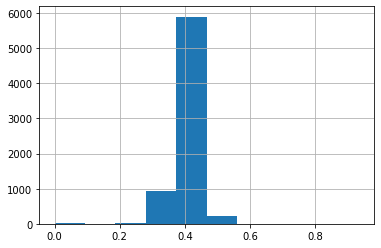

In [34]:
plt.figure(figsize=(6,4))
df_news['Subjectivity'].hist()
plt.show()

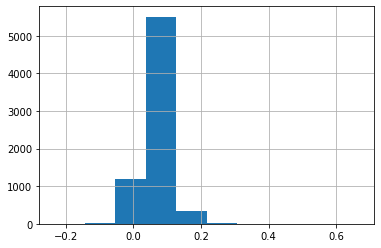

In [35]:
plt.figure(figsize=(6,4))
df_news['Polarity'].hist()
plt.show()

<AxesSubplot:xlabel='Opinion', ylabel='count'>

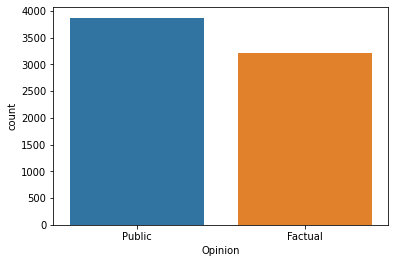

In [36]:
sns.countplot(df_news['Opinion'])

## Stocks Data: Pre-processing and EDA

In [37]:
stocks = pd.read_csv('Stocks.csv')

In [38]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0


In [39]:
len(stocks)

5857

In [40]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5857 entries, 0 to 5856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5857 non-null   object 
 1   Open       5730 non-null   float64
 2   High       5730 non-null   float64
 3   Low        5730 non-null   float64
 4   Close      5730 non-null   float64
 5   Adj Close  5730 non-null   float64
 6   Volume     5730 non-null   float64
dtypes: float64(6), object(1)
memory usage: 320.4+ KB


In [41]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5.730000e+03
mean,16184.705540,16284.947780,16052.472215,16165.500311,16165.500311,6.874466e+04
std,11371.411607,11414.247611,11301.064909,11354.496290,11354.496290,9.891432e+05
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,4774.472412,4814.192382,4709.352417,4750.507569,4750.507569,0.000000e+00
50%,15810.515137,15970.504882,15653.195312,15814.040040,15814.040040,1.200000e+04
75%,25624.992676,25761.327637,25435.435547,25590.240235,25590.240235,1.900000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


In [42]:
stocks['HL_pct']=((stocks['High']-stocks['Low'])/stocks['Low'])*100
stocks['PCT_change']=((stocks['Close']-stocks['Open'])/stocks['Open'])*100

In [43]:
stocks = stocks.drop(['Open','High','Close','Low'], axis=1)

In [44]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,1997-07-01,4300.859863,0.0,1.273875,0.885504
1,1997-07-02,4333.899902,0.0,2.325980,0.719039
2,1997-07-03,4323.459961,0.0,2.170243,-0.284379
3,1997-07-04,4323.819824,0.0,1.093103,-0.204962
4,1997-07-07,4291.450195,0.0,2.366704,-0.817227


In [45]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [46]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,1997-07-01,4300.859863,0.0,1.273875,0.885504
1,1997-07-02,4333.899902,0.0,2.325980,0.719039
2,1997-07-03,4323.459961,0.0,2.170243,-0.284379
3,1997-07-04,4323.819824,0.0,1.093103,-0.204962
4,1997-07-07,4291.450195,0.0,2.366704,-0.817227


In [47]:
df_news.columns = ['Date', 'Headline', 'Polarity', 'Subjectivity', 'Sentiment', 'Opinion']

### Merging the News and Stocks Datasets on the basis of Dates

In [48]:
merge_data = df_news.merge(stocks, how='inner', on='Date', left_index = True)

In [49]:
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
914,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public,NaN,NaN,NaN,NaN
915,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual,4018.879883,0.0,2.524576,1.660922
916,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual,4060.020020,0.0,2.264689,2.072616
917,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public,4115.370117,0.0,1.737913,-1.569016
918,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public,4183.729980,0.0,1.935672,1.637137


In [50]:
merge_data = merge_data.reset_index()

In [51]:
merge_data.head()

,index,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,914,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public,NaN,NaN,NaN,NaN
1,915,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual,4018.879883,0.0,2.524576,1.660922
2,916,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual,4060.020020,0.0,2.264689,2.072616
3,917,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public,4115.370117,0.0,1.737913,-1.569016
4,918,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public,4183.729980,0.0,1.935672,1.637137


In [52]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         4840 non-null   int64         
 1   Date          4840 non-null   datetime64[ns]
 2   Headline      4840 non-null   object        
 3   Polarity      4840 non-null   float64       
 4   Subjectivity  4840 non-null   float64       
 5   Sentiment     4840 non-null   object        
 6   Opinion       4840 non-null   object        
 7   Adj Close     4766 non-null   float64       
 8   Volume        4766 non-null   float64       
 9   HL_pct        4766 non-null   float64       
 10  PCT_change    4766 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 416.1+ KB


In [53]:
merge_data = merge_data.drop(0)

In [54]:
merge_data = merge_data[merge_data['Adj Close'].notna()]

In [55]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4766 entries, 1 to 4839
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         4766 non-null   int64         
 1   Date          4766 non-null   datetime64[ns]
 2   Headline      4766 non-null   object        
 3   Polarity      4766 non-null   float64       
 4   Subjectivity  4766 non-null   float64       
 5   Sentiment     4766 non-null   object        
 6   Opinion       4766 non-null   object        
 7   Adj Close     4766 non-null   float64       
 8   Volume        4766 non-null   float64       
 9   HL_pct        4766 non-null   float64       
 10  PCT_change    4766 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 446.8+ KB


In [56]:
merge_data = merge_data.reset_index()
merge_data.head()

,level_0,index,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,1,915,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual,4018.879883,0.0,2.524576,1.660922
1,2,916,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual,4060.020020,0.0,2.264689,2.072616
2,3,917,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public,4115.370117,0.0,1.737913,-1.569016
3,4,918,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public,4183.729980,0.0,1.935672,1.637137
4,5,919,2001-01-08,. Frontrunner for key US post seen having Pak ...,-0.019214,0.414653,Neutral,Public,4120.430176,0.0,2.564663,-1.064397


In [57]:
merge_data = merge_data.drop(['level_0', 'index'], axis=1)
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual,4018.879883,0.0,2.524576,1.660922
1,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual,4060.020020,0.0,2.264689,2.072616
2,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public,4115.370117,0.0,1.737913,-1.569016
3,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public,4183.729980,0.0,1.935672,1.637137
4,2001-01-08,. Frontrunner for key US post seen having Pak ...,-0.019214,0.414653,Neutral,Public,4120.430176,0.0,2.564663,-1.064397


### Considering only required columns of the merged Dataset

In [58]:
df_needed = merge_data[['Date', 'Polarity', 'Subjectivity','Adj Close','HL_pct','PCT_change']]
df_needed.head()

,Date,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,2001-01-02,0.151333,0.282333,4018.879883,2.524576,1.660922
1,2001-01-03,0.163636,0.363636,4060.020020,2.264689,2.072616
2,2001-01-04,0.087961,0.446847,4115.370117,1.737913,-1.569016
3,2001-01-05,0.260401,0.473984,4183.729980,1.935672,1.637137
4,2001-01-08,-0.019214,0.414653,4120.430176,2.564663,-1.064397


In [59]:
df_needed = df_needed.set_index('Date')

In [60]:
df_needed.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2001-01-02,0.151333,0.282333,4018.879883,2.524576,1.660922
2001-01-03,0.163636,0.363636,4060.020020,2.264689,2.072616
2001-01-04,0.087961,0.446847,4115.370117,1.737913,-1.569016
2001-01-05,0.260401,0.473984,4183.729980,1.935672,1.637137
2001-01-08,-0.019214,0.414653,4120.430176,2.564663,-1.064397


### Scaling the data using MinMaxScaler to develop a model based on it.

In [61]:
scaler = MinMaxScaler()
new = pd.DataFrame(scaler.fit_transform(df_needed))
new.columns = df_needed.columns
new.index=df_needed.index
new.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2001-01-02,0.524545,0.498235,0.036053,0.121478,0.611044
2001-01-03,0.541322,0.641711,0.037098,0.107422,0.632126
2001-01-04,0.438129,0.788554,0.038505,0.078930,0.445646
2001-01-05,0.673274,0.836442,0.040242,0.089626,0.609826
2001-01-08,0.291981,0.731740,0.038633,0.123646,0.471486


In [62]:
trainSet = new[: int(0.7*(len(new)))]
testSet = new[int(0.7*(len(new))):]

In [63]:
model = VAR(endog = trainSet)
fit = model.fit()

/home/sujay/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### Predicted vs Test Set

In [64]:
pred = fit.forecast(fit.y, steps=len(testSet))
predicted = pd.DataFrame(pred, columns=new.columns)

/home/sujay/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [65]:
predicted.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,0.413360,0.710387,0.604922,0.055090,0.518111
1,0.413616,0.708133,0.605069,0.059840,0.520200
2,0.413680,0.707682,0.605227,0.062573,0.520052
3,0.413734,0.707541,0.605387,0.064234,0.520015
4,0.413772,0.707480,0.605548,0.065238,0.519990


In [66]:
testSet.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2014-08-19,0.393762,0.694607,0.605312,0.014207,0.514024
2014-08-20,0.421160,0.755115,0.602609,0.031636,0.490817
2014-08-21,0.395058,0.718656,0.603773,0.026591,0.533277
2014-08-22,0.418938,0.710504,0.605284,0.010580,0.525996
2014-08-25,0.458556,0.735724,0.605728,0.031865,0.515690


### Check the accuracy

In [67]:
np.sqrt(mean_squared_error(predicted['Adj Close'], testSet['Adj Close']))

0.0800196848917188

/home/sujay/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


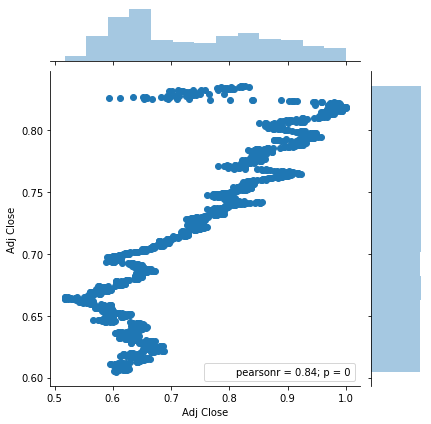

In [68]:
sns.jointplot(testSet['Adj Close'], predicted['Adj Close']).annotate(stats.pearsonr)
plt.show()